In [ ]:
#for edge detection 
import numpy as np
import matplotlib.pyplot as plt

def edge_detection(image, threshold):
    # Define the edge detection kernel (sobel operator)
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Perform convolution with the kernels
    edges_x = convolve2d(image, kernel_x)
    edges_y = convolve2d(image, kernel_y)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(edges_x**2 + edges_y**2)

    # Apply thresholding to obtain binary edges
    binary_edges = (gradient_magnitude > threshold).astype(np.uint8) * 255

    return binary_edges

# Perform 2D convolution using numpy
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    padded_image = np.pad(image, ((kernel_height//2, kernel_height//2), (kernel_width//2, kernel_width//2)), mode='edge')
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(image_height):
        for j in range(image_width):
            patch = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(patch * kernel)

    return output

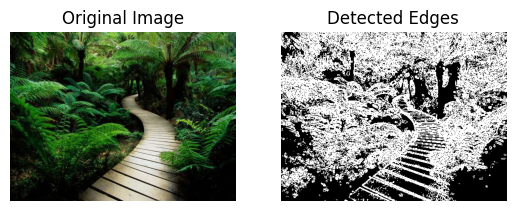

In [ ]:
# Load the image
image = plt.imread("/content/sample_data/image.jpg")

# Convert the image to grayscale
grayscale_image = np.mean(image, axis=2)

# Perform edge detection
edges = edge_detection(grayscale_image, threshold=50)


# Display the original and detected edges
plt.subplot(121)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title("Detected Edges")
plt.axis("off")



plt.show()


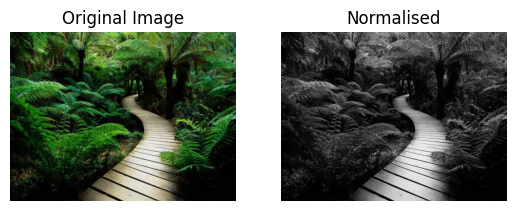

In [ ]:
#for normalization 
def normalize_image(image):
    """
    Normalize an image by scaling its pixel values to the range [0, 1].
    
    Args:
        image (numpy.ndarray): Input image as a NumPy array.
    
    Returns:
        numpy.ndarray: Normalized image.
    """
    # Convert the image to float type
    image = image.astype(float)
    
    # Normalize the image
    image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    return image_normalized


normalised=normalize_image(grayscale_image)
plt.subplot(121)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(normalised, cmap='gray')
plt.title("Normalised")
plt.axis("off")



plt.show()


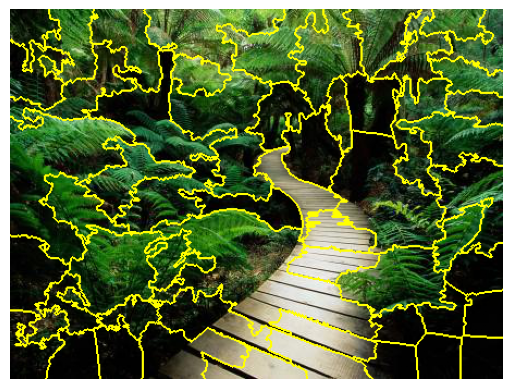

In [ ]:
import numpy as np
from skimage import io, segmentation
from skimage.color import rgb2lab
import matplotlib.pyplot as plt

def segment_image(image_path, num_segments):
    """
    Perform image segmentation using K-means clustering.
    
    Args:
        image_path (str): Path to the input image file.
        num_segments (int): Number of segments for image segmentation.
    
    Returns:
        numpy.ndarray: Segmented image.
    """
    # Load the image
    image = io.imread(image_path)
    
    # Convert the image to Lab color space
    lab_image = rgb2lab(image)
    
    # Perform K-means clustering on the Lab image
    labels = segmentation.slic(lab_image, n_segments=num_segments, compactness=10)
    
    # Create a segmented image using the labels
    segmented_image = segmentation.mark_boundaries(image, labels)
    
    return segmented_image


# Example usage
image_path = '/content/sample_data/image.jpg'
num_segments = 100
segmented_image = segment_image(image_path, num_segments)

# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
plt.show()
